In [1]:
import sys
sys.path.append("../") # go to parent dir
from aeroroutes.tools import convert_dms_to_dec
from aeroroutes.routes import ComputeOrto
from aeroroutes.routes import ComputeLoxo
from aeroroutes.tools import plot_routes
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# origin and destination
# Madrid:
LEMD_lon = convert_dms_to_dec(3, 34, 2.47, 'W')
LEMD_lat = convert_dms_to_dec(40, 29, 37.62, 'N')
# Tokyo:
RJAA_lon = convert_dms_to_dec(140, 23, 17.66, 'E')
RJAA_lat = convert_dms_to_dec(35, 46, 24.78, 'N')

In [3]:
# create instances
# Orthodrome:
orthodrome = ComputeOrto([LEMD_lon, LEMD_lat], [RJAA_lon, RJAA_lat], 100)
# Loxodrome
loxodrome = ComputeLoxo([LEMD_lon, LEMD_lat], [RJAA_lon, RJAA_lat], 100)

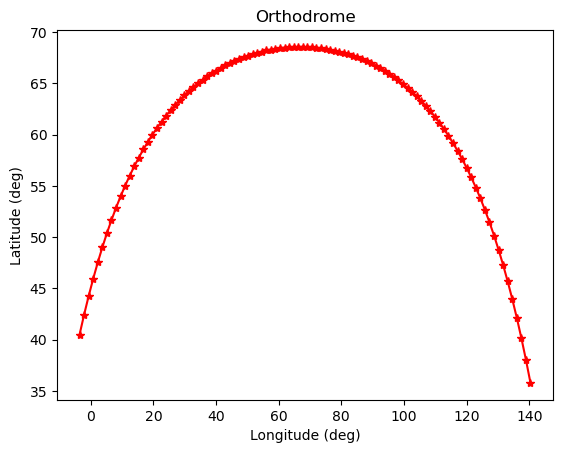

Distance: 10769.25292674978 km
Arc Between points: 96.850218366296 deg


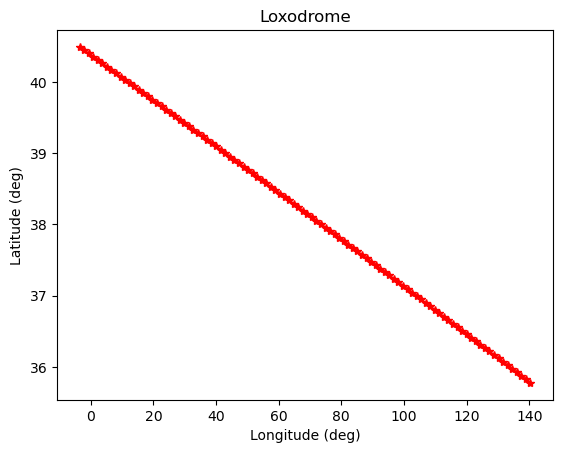

Distance: 12593.754742038487 km
Geographic Track: -87.61140980228046 deg


In [4]:
# obtain outputs values

#Route with lons and lats along all segments.
# Orthodrome:
lon_o, lat_o = orthodrome.get_route()
plt.plot(lon_o, lat_o, 'r-*')
plt.title("Orthodrome")
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.show()
# Orthodrome Route distances in km.:
d_o = orthodrome.get_distance_km()
print(f'Distance: {d_o} km')
# Arc between point in the orthodrome route.
a_o = orthodrome.get_arc_between_points()
print(f'Arc Between points: {a_o} deg')

# Loxodrome
lon_l, lat_l = loxodrome.get_route()
plt.plot(lon_l, lat_l, 'r-*')
plt.title("Loxodrome")
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.show()
# Loxodrome Route distances in km.
d_l = loxodrome.get_distance_km()
print(f'Distance: {d_l} km')
# Geographic track in deg.
gamma_o = loxodrome.get_geographic_track()
print(f'Geographic Track: {gamma_o} deg')

In [5]:
d_l

12593.754742038487

In [6]:
gamma_o

-87.61140980228046

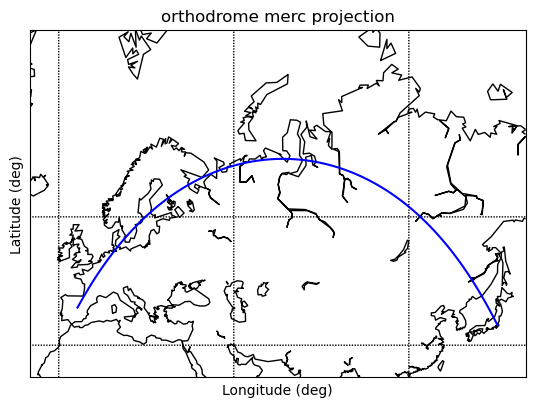

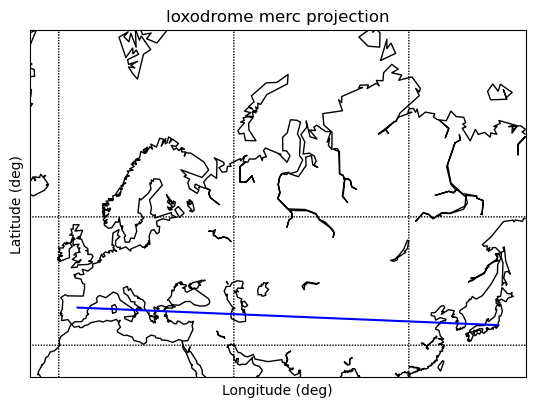

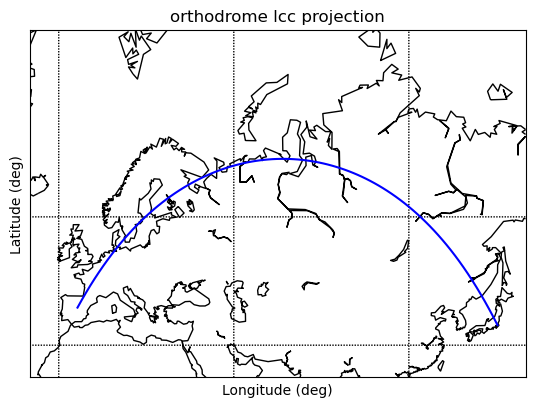

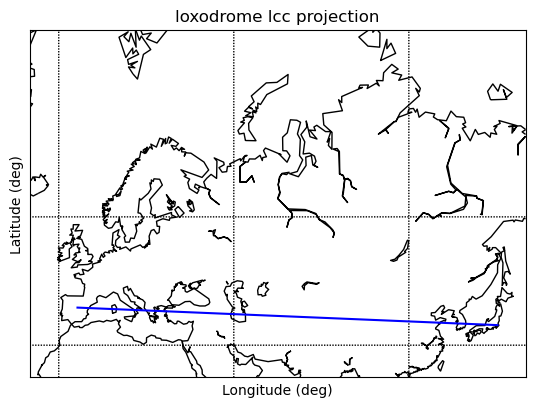

In [7]:
# Plot using Mercator projection
args_basemap = {"projection": 'merc', "llcrnrlat": 20, "urcrnrlat": 80, "llcrnrlon": -20, "urcrnrlon": 150, "lat_ts": 20, "resolution": 'c'}
plot_routes(orthodrome.lon_deg, orthodrome.lat_deg, 'orthodrome merc projection', np.arange(30., 91., 30.), np.arange(-10., 181., 60.), **args_basemap)
plot_routes(loxodrome.lon_deg, loxodrome.lat_deg, 'loxodrome merc projection', np.arange(30., 91., 30.), np.arange(-10., 181., 60.), **args_basemap)
# Plot using Lamber Conformal projection
kwargs = {"projection": 'lcc', "width": 12000000, "height": 9000000, "rsphere": (6378137.00, 6356752.3142), "resolution": 'l', "area_thresh": 1000., "lat_1": 45, "lat_2": 55, "lat_0": 50, "lon_0": 80.}
plot_routes(orthodrome.lon_deg, orthodrome.lat_deg,  'orthodrome lcc projection', np.arange(30., 91., 30.), np.arange(-10., 181., 60.), **args_basemap)
plot_routes(loxodrome.lon_deg, loxodrome.lat_deg, 'loxodrome lcc projection', np.arange(30., 91., 30.), np.arange(-10., 181., 60.), **args_basemap)